# DTree Classifer Demonstration

In this tutorial we will demonstrate how to use the `DecisionTreeClassifer` class in `scikit-learn` to perform classifications predictions. 


## 1.0 Setup
Import modules


In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier 
from matplotlib import pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV


np.random.seed(1)

## 2.0 Load data
Load data (it's already cleaned and preprocessed)


In [2]:
# Uncomment the following snippet of code to debug problems with finding the .csv file path
# This snippet of code will exit the program and print the current working directory.
#import os
#print(os.getcwd())

In [3]:
X_train = pd.read_csv('../classification-data/airbnb_train_X_price_gte_150.csv') 
y_train = pd.read_csv('../classification-data/airbnb_train_y_price_gte_150.csv') 
X_test = pd.read_csv('../classification-data/airbnb_test_X_price_gte_150.csv') 
y_test = pd.read_csv('../classification-data/airbnb_test_y_price_gte_150.csv') 

FileNotFoundError: [Errno 2] No such file or directory: '../classification-data/airbnb_train_X_price_gte_150.csv'

## 3.0 Model the data

### Fit a DTree classification model using Grid Search

In [ ]:
score_measure = "precision"
kfolds = 5

param_grid = {
    'min_samples_split': [5,10,50,100,200],  
    'min_samples_leaf': [5,10,20,50,100],
    'min_impurity_decrease': [0.0001, 0.0005, 0.0010, 0.0020, 0.0050],
    'max_leaf_nodes': [10,25,50,100,200], 
    'max_depth': [5,10,20,30], 
    'criterion': ['entropy', 'gini'],
}

dtree = DecisionTreeClassifier()
grid_search = GridSearchCV(estimator = dtree, param_grid=param_grid, cv=kfolds, 
                           scoring=score_measure, verbose=1, n_jobs=-1,  # n_jobs=-1 will utilize all available CPUs 
                           return_train_score=True)

_ = grid_search.fit(X_train, y_train)

print(f"The best {score_measure} score is {grid_search.best_score_}")
print(f"... with parameters: {grid_search.best_params_}")

bestPrecessionTreeGrid = grid_search.best_estimator_

Fitting 5 folds for each of 5000 candidates, totalling 25000 fits
The best precision score is 0.8581623158208013
... with parameters: {'criterion': 'entropy', 'max_depth': 10, 'max_leaf_nodes': 25, 'min_impurity_decrease': 0.0001, 'min_samples_leaf': 5, 'min_samples_split': 5}


In [ ]:
c_matrix = confusion_matrix(y_test, grid_search.predict(X_test))
TP = c_matrix[1][1]
TN = c_matrix[0][0]
FP = c_matrix[0][1]
FN = c_matrix[1][0]

performance_metrics_grid = f"Accuracy={(TP+TN)/(TP+TN+FP+FN):.4f} Precision={TP/(TP+FP):.4f} Recall={TP/(TP+FN):.4f} F1={2*TP/(2*TP+FP+FN):.4f}"
performance_metrics_grid

'Accuracy=0.8388 Precision=0.8656 Recall=0.8004 F1=0.8317'

### Conduct an exhaustive search across a smaller range of parameters around the parameters found in the initial Grid search.

In [ ]:
score_measure = "precision"
kfolds = 5

min_samples_split = grid_search.best_params_['min_samples_split']
min_samples_leaf = grid_search.best_params_['min_samples_leaf']
min_impurity_decrease = grid_search.best_params_['min_impurity_decrease']
max_leaf_nodes = grid_search.best_params_['max_leaf_nodes']
max_depth = grid_search.best_params_['max_depth']
criterion = grid_search.best_params_['criterion']

param_grid = {
    'min_samples_split': np.arange(min_samples_split-2,min_samples_split+2),  
    'min_samples_leaf': np.arange(min_samples_leaf-2,min_samples_leaf+2),
    'min_impurity_decrease': np.arange(min_impurity_decrease-0.0001, min_impurity_decrease+0.0001, 0.00005),
    'max_leaf_nodes': np.arange(max_leaf_nodes-2,max_leaf_nodes+2), 
    'max_depth': np.arange(max_depth-2,max_depth+2), 
    'criterion': [criterion]
}
dtree = DecisionTreeClassifier()
grid_search_exh = GridSearchCV(estimator = dtree, param_grid=param_grid, cv=kfolds, 
                           scoring=score_measure, verbose=1, n_jobs=-1,  # n_jobs=-1 will utilize all available CPUs 
                           return_train_score=True)

_ = grid_search_exh.fit(X_train, y_train)

print(f"The best {score_measure} score is {grid_search_exh.best_score_}")
print(f"... with parameters: {grid_search_exh.best_params_}")

bestPrecessionTreeGridexh = grid_search_exh.best_estimator_

Fitting 5 folds for each of 1024 candidates, totalling 5120 fits
The best precision score is 0.8605011291818
... with parameters: {'criterion': 'entropy', 'max_depth': 8, 'max_leaf_nodes': 25, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 6, 'min_samples_split': 3}


In [ ]:
c_matrix = confusion_matrix(y_test, grid_search_exh.predict(X_test))
TP = c_matrix[1][1]
TN = c_matrix[0][0]
FP = c_matrix[0][1]
FN = c_matrix[1][0]
performance_metrics_exhgrid = f"Accuracy={(TP+TN)/(TP+TN+FP+FN):.4f} Precision={TP/(TP+FP):.4f} Recall={TP/(TP+FN):.4f} F1={2*TP/(2*TP+FP+FN):.4f}"
performance_metrics_exhgrid

'Accuracy=0.8407 Precision=0.8676 Recall=0.8023 F1=0.8337'

### Fit a DTree classification model using random Search

In [ ]:
score_measure = "precision"
kfolds = 5

param_grid = {
    'min_samples_split': [5,10,50,100,200],  
    'min_samples_leaf': [5,10,20,50,100],
    'min_impurity_decrease': [0.0001, 0.0005, 0.0010, 0.0020, 0.0050],
    'max_leaf_nodes': [10,25,50,100,200], 
    'max_depth': [5,10,20,30], 
    'criterion': ['entropy', 'gini'],
}

dtree = DecisionTreeClassifier()
rand_search = RandomizedSearchCV(estimator = dtree, param_distributions=param_grid, cv=kfolds, n_iter=1000,
                           scoring=score_measure, verbose=1, n_jobs=-1,  # n_jobs=-1 will utilize all available CPUs 
                           return_train_score=True)

_ = rand_search.fit(X_train, y_train)

print(f"The best {score_measure} score is {rand_search.best_score_}")
print(f"... with parameters: {rand_search.best_params_}")

bestPrecessionTreeRand = rand_search.best_estimator_

Fitting 5 folds for each of 1000 candidates, totalling 5000 fits
The best precision score is 0.8581623158208013
... with parameters: {'min_samples_split': 10, 'min_samples_leaf': 5, 'min_impurity_decrease': 0.002, 'max_leaf_nodes': 25, 'max_depth': 30, 'criterion': 'entropy'}


In [ ]:
c_matrix = confusion_matrix(y_test, rand_search.predict(X_test))
TP = c_matrix[1][1]
TN = c_matrix[0][0]
FP = c_matrix[0][1]
FN = c_matrix[1][0]
performance_metrics_rand = f"Accuracy={(TP+TN)/(TP+TN+FP+FN):.4f} Precision={TP/(TP+FP):.4f} Recall={TP/(TP+FN):.4f} F1={2*TP/(2*TP+FP+FN):.4f}"
performance_metrics_rand

'Accuracy=0.8379 Precision=0.8653 Recall=0.7985 F1=0.8306'

### Conduct an exhaustive random search across a smaller range of parameters around the parameters found in the initial random search.

In [ ]:
score_measure = "precision"
kfolds = 5

min_samples_split = rand_search.best_params_['min_samples_split']
min_samples_leaf = rand_search.best_params_['min_samples_leaf']
min_impurity_decrease = rand_search.best_params_['min_impurity_decrease']
max_leaf_nodes = rand_search.best_params_['max_leaf_nodes']
max_depth = rand_search.best_params_['max_depth']
criterion = rand_search.best_params_['criterion']

param_grid = {
    'min_samples_split': np.arange(min_samples_split-2,min_samples_split+2),  
    'min_samples_leaf': np.arange(min_samples_leaf-2,min_samples_leaf+2),
    'min_impurity_decrease': np.arange(min_impurity_decrease-0.0001, min_impurity_decrease+0.0001, 0.00005),
    'max_leaf_nodes': np.arange(max_leaf_nodes-2,max_leaf_nodes+2), 
    'max_depth': np.arange(max_depth-2,max_depth+2), 
    'criterion': [criterion]
}
dtree = DecisionTreeClassifier()
rand_search_exh = RandomizedSearchCV(estimator = dtree, param_distributions=param_grid, cv=kfolds, n_iter=1000,
                           scoring=score_measure, verbose=1, n_jobs=-1,  # n_jobs=-1 will utilize all available CPUs 
                           return_train_score=True)

_ = rand_search_exh.fit(X_train, y_train)

print(f"The best {score_measure} score is {rand_search_exh.best_score_}")
print(f"... with parameters: {rand_search_exh.best_params_}")

bestPrecessionTreeRandexh = rand_search_exh.best_estimator_

Fitting 5 folds for each of 1000 candidates, totalling 5000 fits
The best precision score is 0.8605011291818
... with parameters: {'min_samples_split': 10, 'min_samples_leaf': 6, 'min_impurity_decrease': 0.0019, 'max_leaf_nodes': 25, 'max_depth': 30, 'criterion': 'entropy'}


In [ ]:
c_matrix = confusion_matrix(y_test, rand_search_exh.predict(X_test))
TP = c_matrix[1][1]
TN = c_matrix[0][0]
FP = c_matrix[0][1]
FN = c_matrix[1][0]
performance_metrics_exhrand = f"Accuracy={(TP+TN)/(TP+TN+FP+FN):.4f} Precision={TP/(TP+FP):.4f} Recall={TP/(TP+FN):.4f} F1={2*TP/(2*TP+FP+FN):.4f}"
performance_metrics_exhrand

'Accuracy=0.8388 Precision=0.8656 Recall=0.8004 F1=0.8317'

### Conduct an exhaustive grid search across a smaller range of parameters around the parameters found in the initial random search.

In [ ]:
score_measure = "precision"
kfolds = 5

min_samples_split = rand_search.best_params_['min_samples_split']
min_samples_leaf = rand_search.best_params_['min_samples_leaf']
min_impurity_decrease = rand_search.best_params_['min_impurity_decrease']
max_leaf_nodes = rand_search.best_params_['max_leaf_nodes']
max_depth = rand_search.best_params_['max_depth']
criterion = rand_search.best_params_['criterion']

param_grid = {
    'min_samples_split': np.arange(min_samples_split-2,min_samples_split+2),  
    'min_samples_leaf': np.arange(min_samples_leaf-2,min_samples_leaf+2),
    'min_impurity_decrease': np.arange(min_impurity_decrease-0.0001, min_impurity_decrease+0.0001, 0.00005),
    'max_leaf_nodes': np.arange(max_leaf_nodes-2,max_leaf_nodes+2), 
    'max_depth': np.arange(max_depth-2,max_depth+2), 
    'criterion': [criterion]
}
dtree = DecisionTreeClassifier()

grid_search_exh2 = GridSearchCV(estimator = dtree, param_grid=param_grid, cv=kfolds, 
                           scoring=score_measure, verbose=1, n_jobs=-1,  # n_jobs=-1 will utilize all available CPUs 
                           return_train_score=True)

_ = grid_search_exh2.fit(X_train, y_train)


print(f"The best {score_measure} score is {grid_search_exh2.best_score_}")
print(f"... with parameters: {grid_search_exh2.best_params_}")

bestPrecessionTreeRandexh = grid_search_exh2.best_estimator_

Fitting 5 folds for each of 1024 candidates, totalling 5120 fits
The best precision score is 0.8605011291818
... with parameters: {'criterion': 'entropy', 'max_depth': 28, 'max_leaf_nodes': 25, 'min_impurity_decrease': 0.0019, 'min_samples_leaf': 6, 'min_samples_split': 9}


In [ ]:
c_matrix = confusion_matrix(y_test, grid_search_exh2.predict(X_test))
TP = c_matrix[1][1]
TN = c_matrix[0][0]
FP = c_matrix[0][1]
FN = c_matrix[1][0]
performance_metrics_exhgrid2 = f"Accuracy={(TP+TN)/(TP+TN+FP+FN):.4f} Precision={TP/(TP+FP):.4f} Recall={TP/(TP+FN):.4f} F1={2*TP/(2*TP+FP+FN):.4f}"
performance_metrics_exhgrid2

'Accuracy=0.8388 Precision=0.8656 Recall=0.8004 F1=0.8317'

### Displaying Results

In [ ]:
print(f"{'Grid Search:':42}Best Precision={grid_search.best_score_:.4f} {performance_metrics_grid}")
print(f"{'Exhaustive Grid Search: ':42}Best Precision={grid_search_exh.best_score_:.4f} {performance_metrics_exhgrid}")
print(f"{'Random Search: ':42}Best Precision={rand_search.best_score_:.4f} {performance_metrics_rand}")
print(f"{'Exhaustive Random Search: ':42}Best Precision={rand_search_exh.best_score_:.4f} {performance_metrics_exhrand}")
print(f"{'Exhaustive Grid Search on Random Search: ':42}Best Precision={grid_search_exh2.best_score_:.4f} {performance_metrics_exhgrid2}")

Grid Search:                              Best Precision=0.8582 Accuracy=0.8388 Precision=0.8656 Recall=0.8004 F1=0.8317
Exhaustive Grid Search:                   Best Precision=0.8605 Accuracy=0.8407 Precision=0.8676 Recall=0.8023 F1=0.8337
Random Search:                            Best Precision=0.8582 Accuracy=0.8379 Precision=0.8653 Recall=0.7985 F1=0.8306
Exhaustive Random Search:                 Best Precision=0.8605 Accuracy=0.8388 Precision=0.8656 Recall=0.8004 F1=0.8317
Exhaustive Grid Search on Random Search:  Best Precision=0.8605 Accuracy=0.8388 Precision=0.8656 Recall=0.8004 F1=0.8317


## 5.0 Importance of features

In [ ]:
np.round(grid_search.best_estimator_.feature_importances_,2)

array([0.  , 0.  , 0.07, 0.1 , 0.66, 0.01, 0.01, 0.06, 0.  , 0.  , 0.  ,
       0.01, 0.  , 0.  , 0.01, 0.01, 0.01, 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.01, 0.03, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.01, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.01, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ])

In [ ]:
np.round(grid_search_exh.best_estimator_.feature_importances_,2)

array([0.  , 0.  , 0.06, 0.1 , 0.66, 0.01, 0.01, 0.06, 0.  , 0.  , 0.01,
       0.01, 0.  , 0.  , 0.01, 0.01, 0.01, 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.01, 0.03, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.01, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.01, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ])

In [ ]:
np.round(rand_search.best_estimator_.feature_importances_,2)

array([0.  , 0.  , 0.07, 0.1 , 0.66, 0.01, 0.01, 0.06, 0.  , 0.  , 0.  ,
       0.01, 0.  , 0.  , 0.01, 0.01, 0.01, 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.01, 0.03, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.01, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.01, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ])

In [ ]:
np.round(rand_search_exh.best_estimator_.feature_importances_,2)

array([0.  , 0.  , 0.07, 0.1 , 0.66, 0.01, 0.01, 0.06, 0.  , 0.  , 0.  ,
       0.01, 0.  , 0.  , 0.01, 0.01, 0.01, 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.01, 0.03, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.01, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.01, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ])

In [ ]:
np.round(grid_search_exh2.best_estimator_.feature_importances_,2)

array([0.  , 0.  , 0.07, 0.1 , 0.66, 0.01, 0.01, 0.06, 0.  , 0.  , 0.  ,
       0.01, 0.  , 0.  , 0.01, 0.01, 0.01, 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.01, 0.03, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.01, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.01, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ])

## 6.0 Diagrams of DTrees

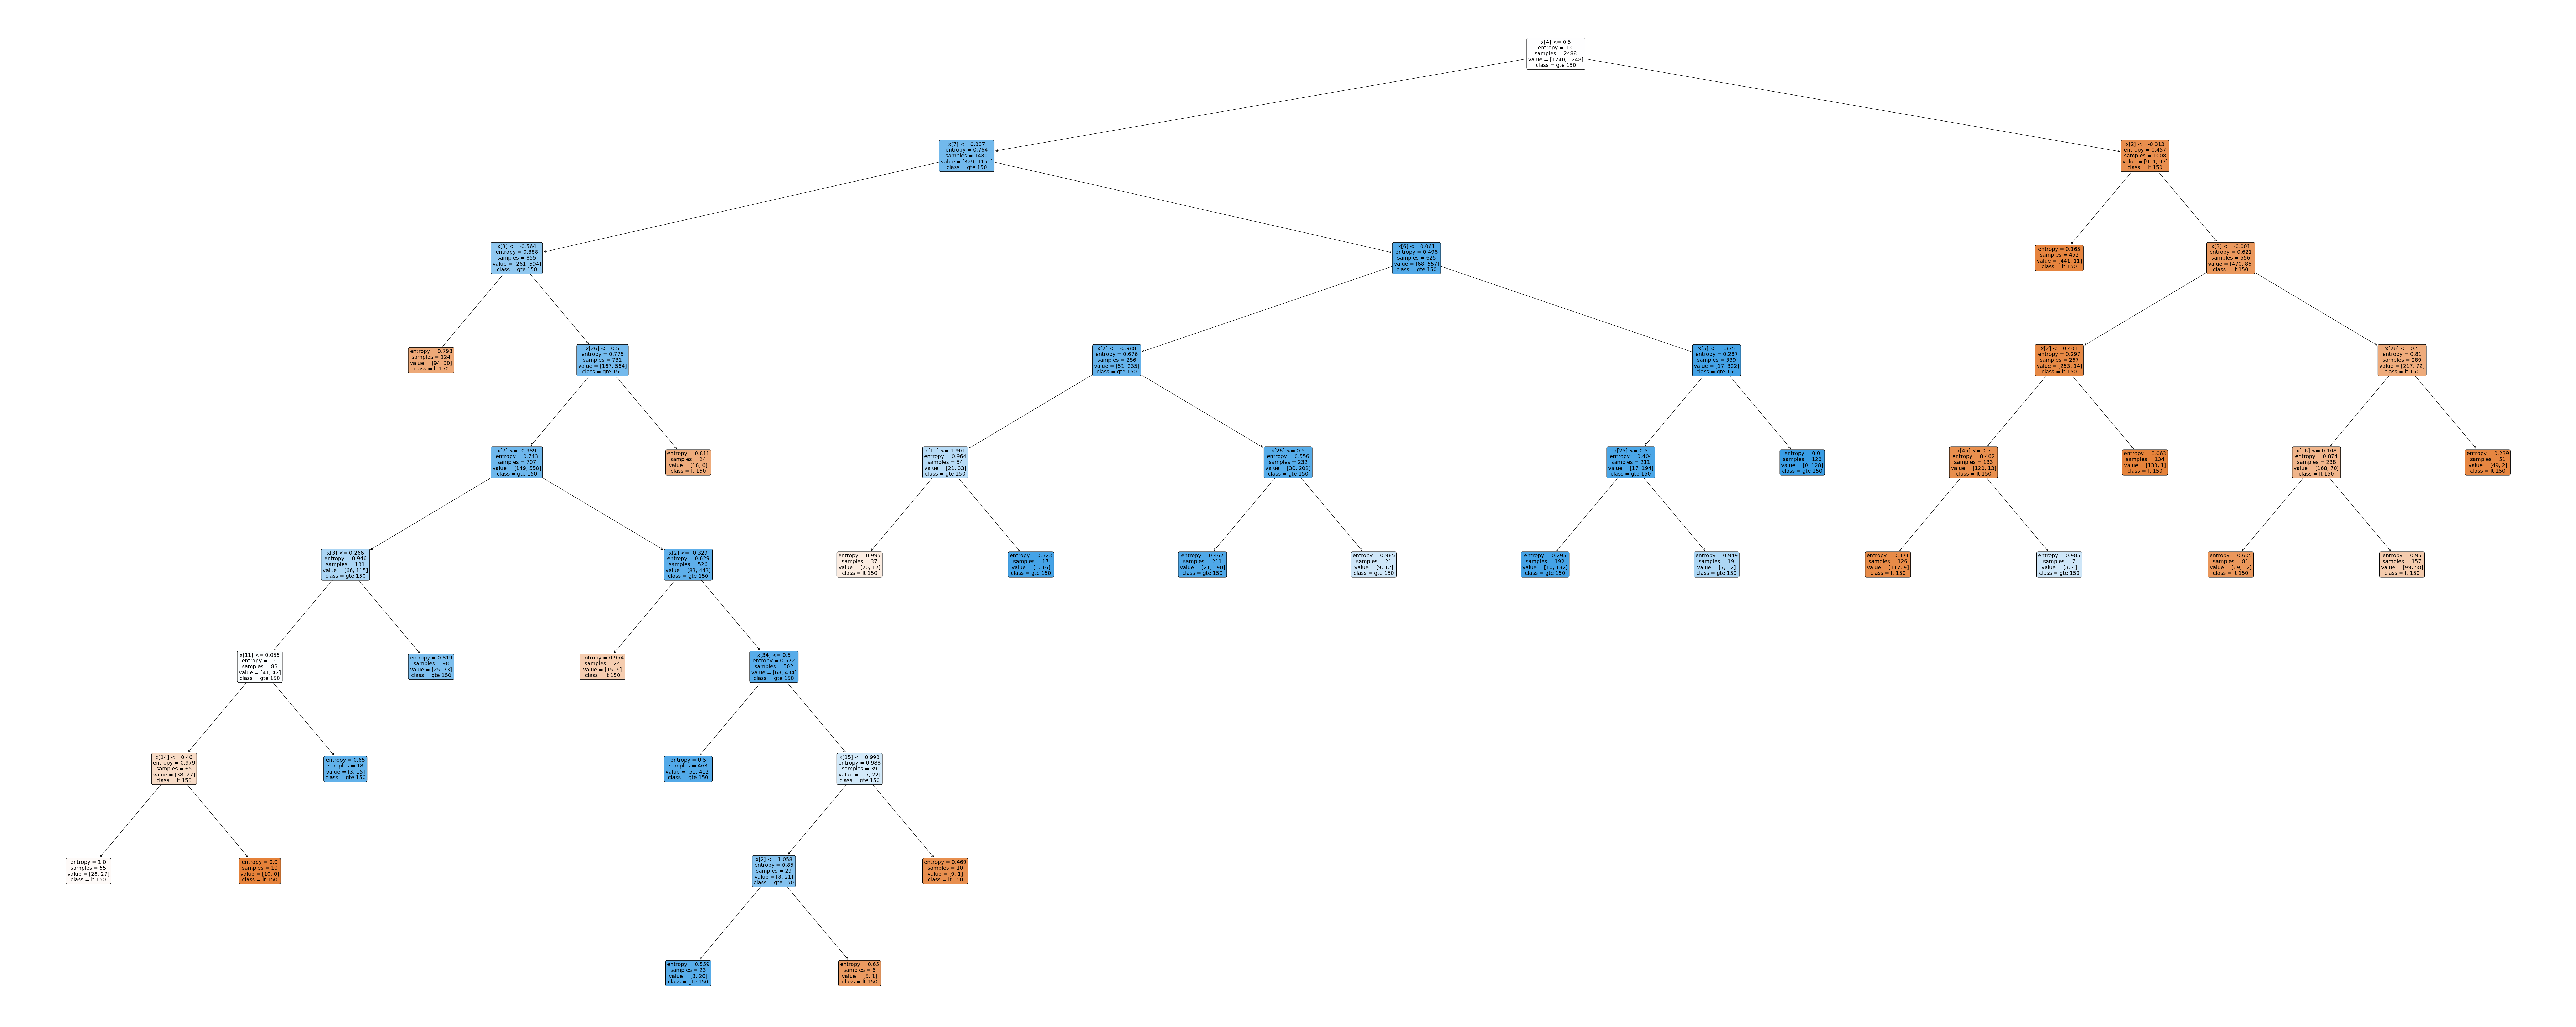

In [ ]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(125,50))
tree = plot_tree(grid_search.best_estimator_, 
              #feature_names=train_inputs.columns.values, # our feature names are stripped from the data set
              class_names=['lt 150', 'gte 150'], 
              filled=True, 
              rounded=True, 
              fontsize=14)

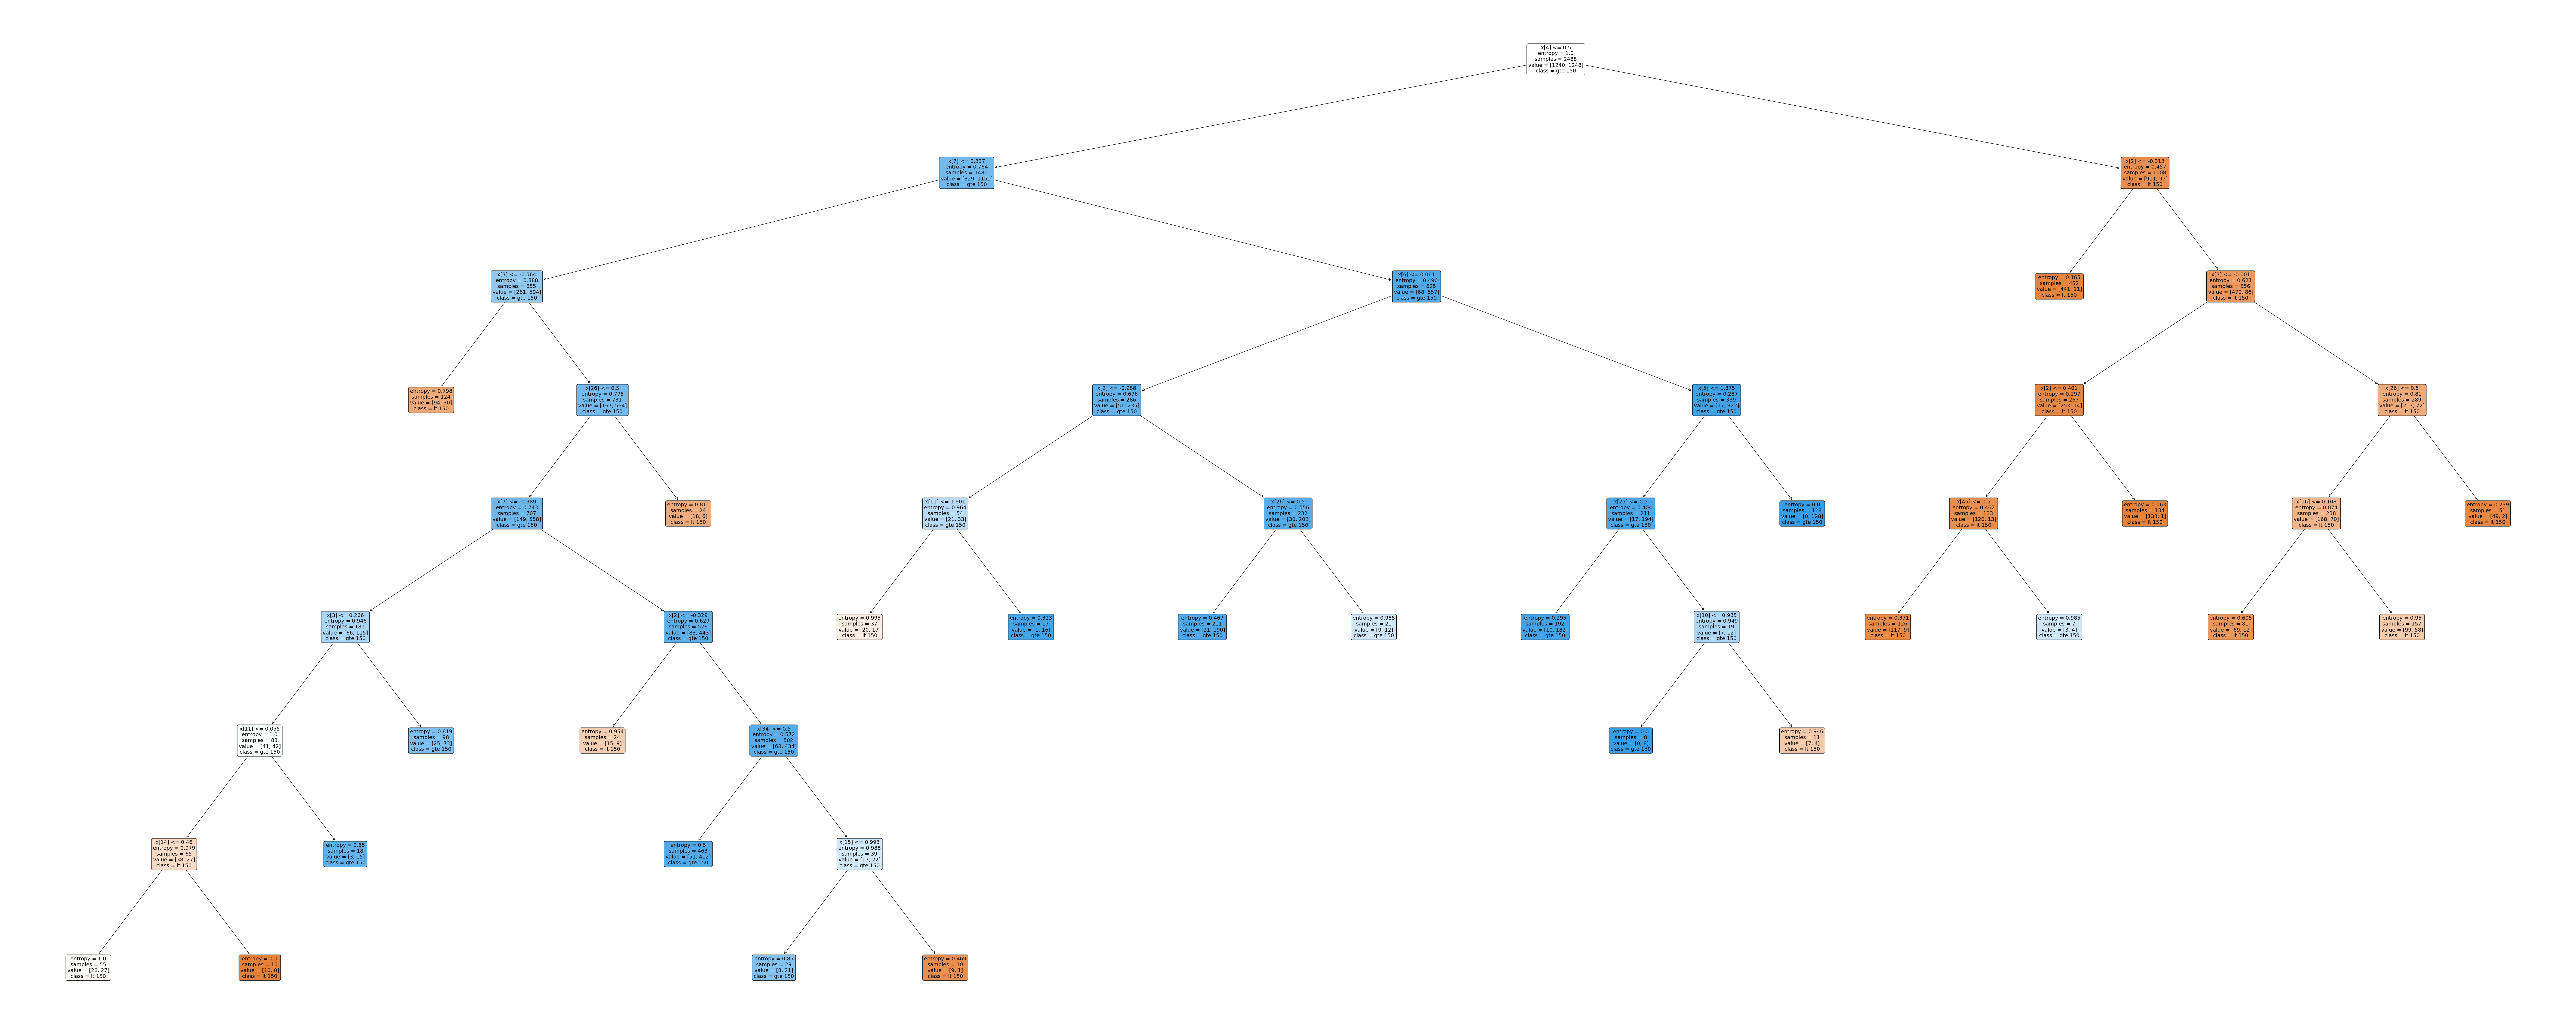

In [ ]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(125,50))
tree = plot_tree(grid_search_exh.best_estimator_, 
              #feature_names=train_inputs.columns.values, # our feature names are stripped from the data set
              class_names=['lt 150', 'gte 150'], 
              filled=True, 
              rounded=True, 
              fontsize=14)

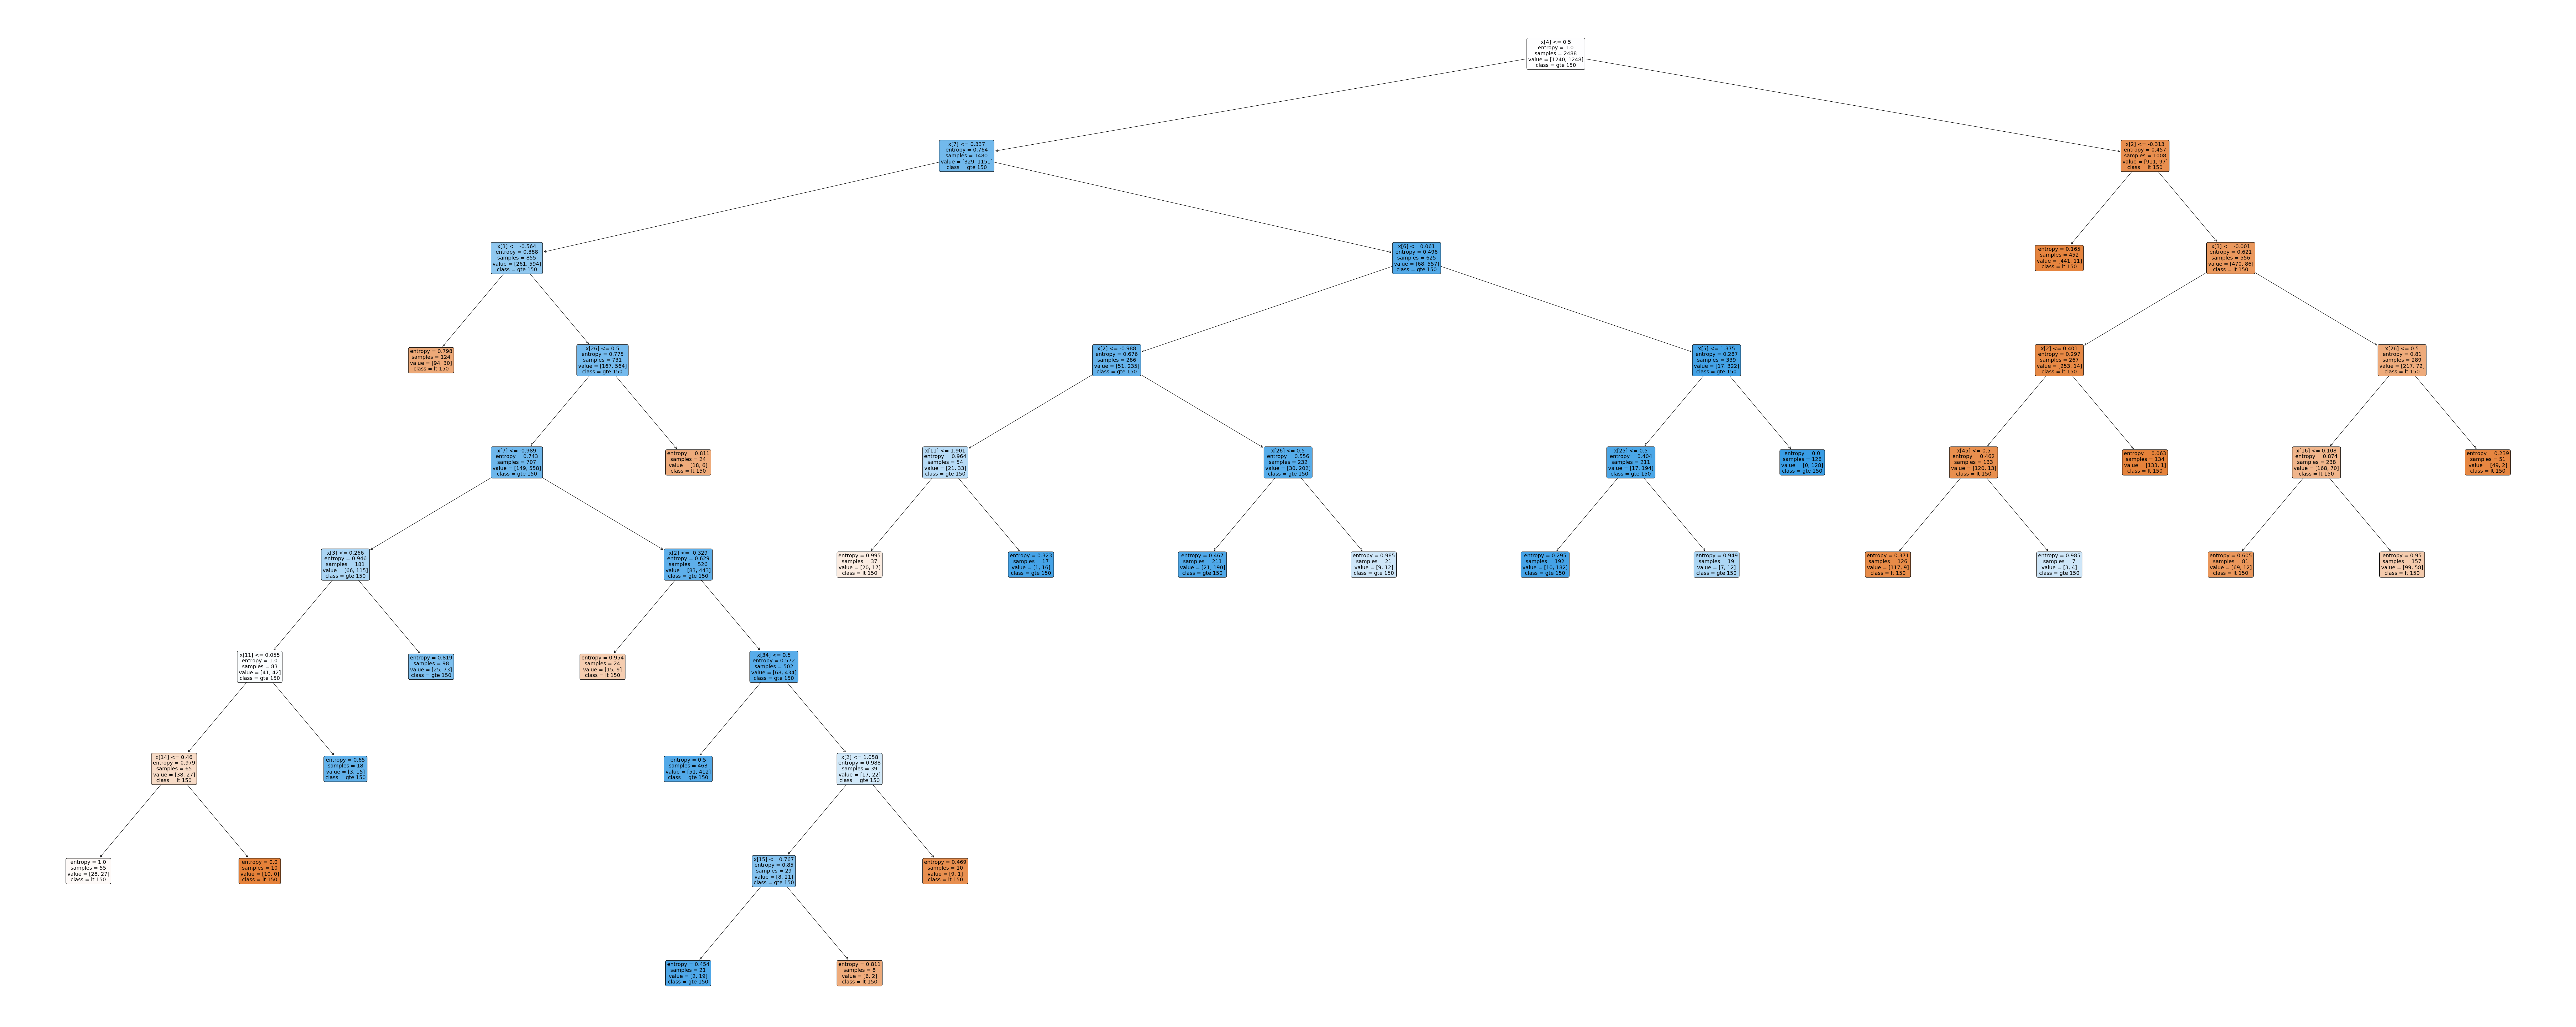

In [ ]:
plt.figure(figsize=(125,50))
tree = plot_tree(rand_search.best_estimator_, 
              #feature_names=train_inputs.columns.values, # our feature names are stripped from the data set
              class_names=['lt 150', 'gte 150'], 
              filled=True, 
              rounded=True, 
              fontsize=14)

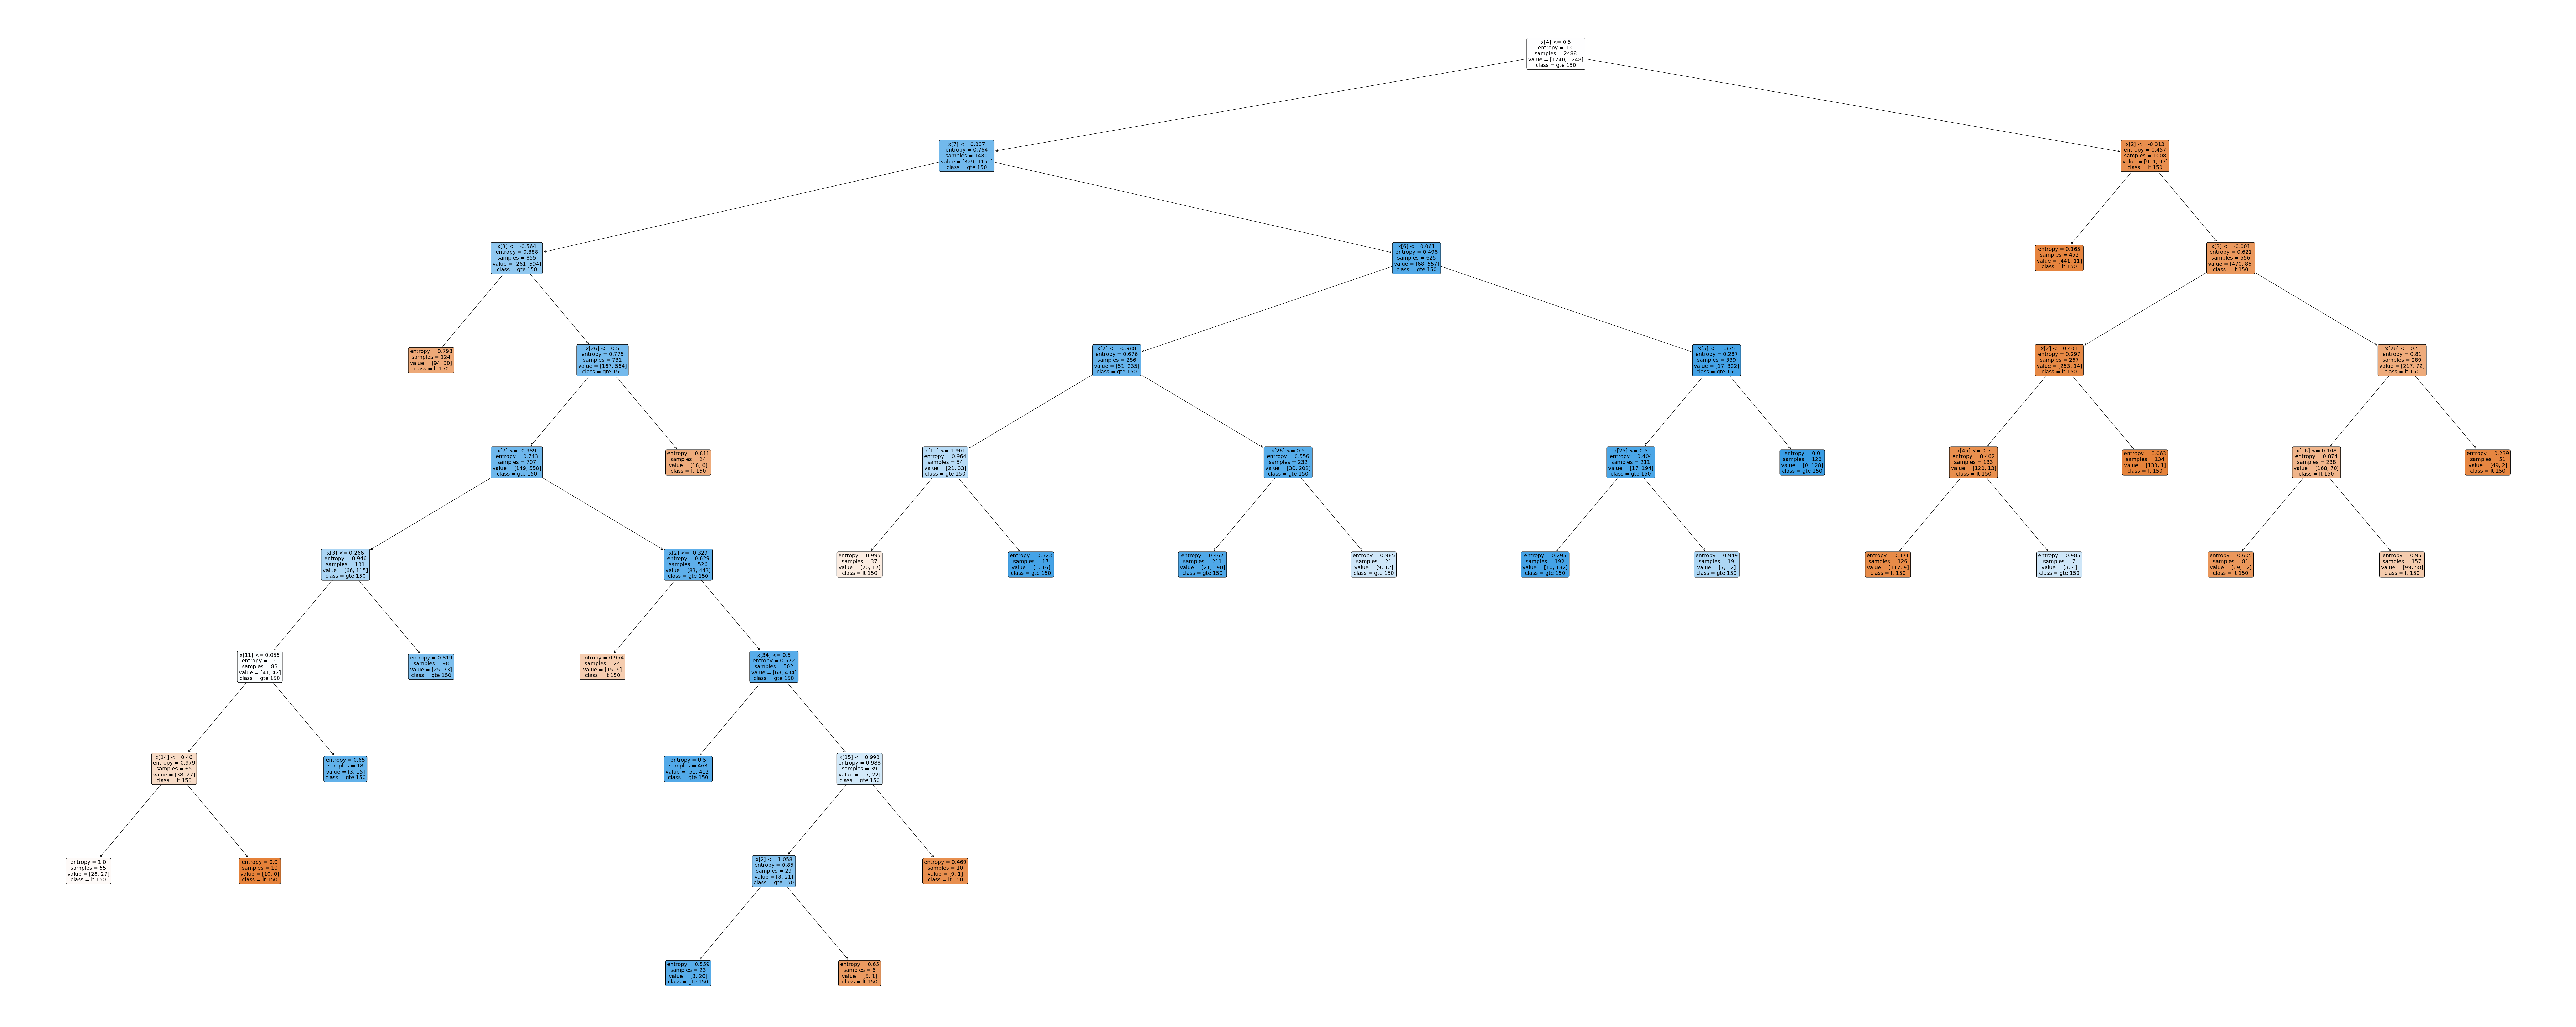

In [ ]:
plt.figure(figsize=(125,50))
tree = plot_tree(rand_search_exh.best_estimator_, 
              #feature_names=train_inputs.columns.values, # our feature names are stripped from the data set
              class_names=['lt 150', 'gte 150'], 
              filled=True, 
              rounded=True, 
              fontsize=14)

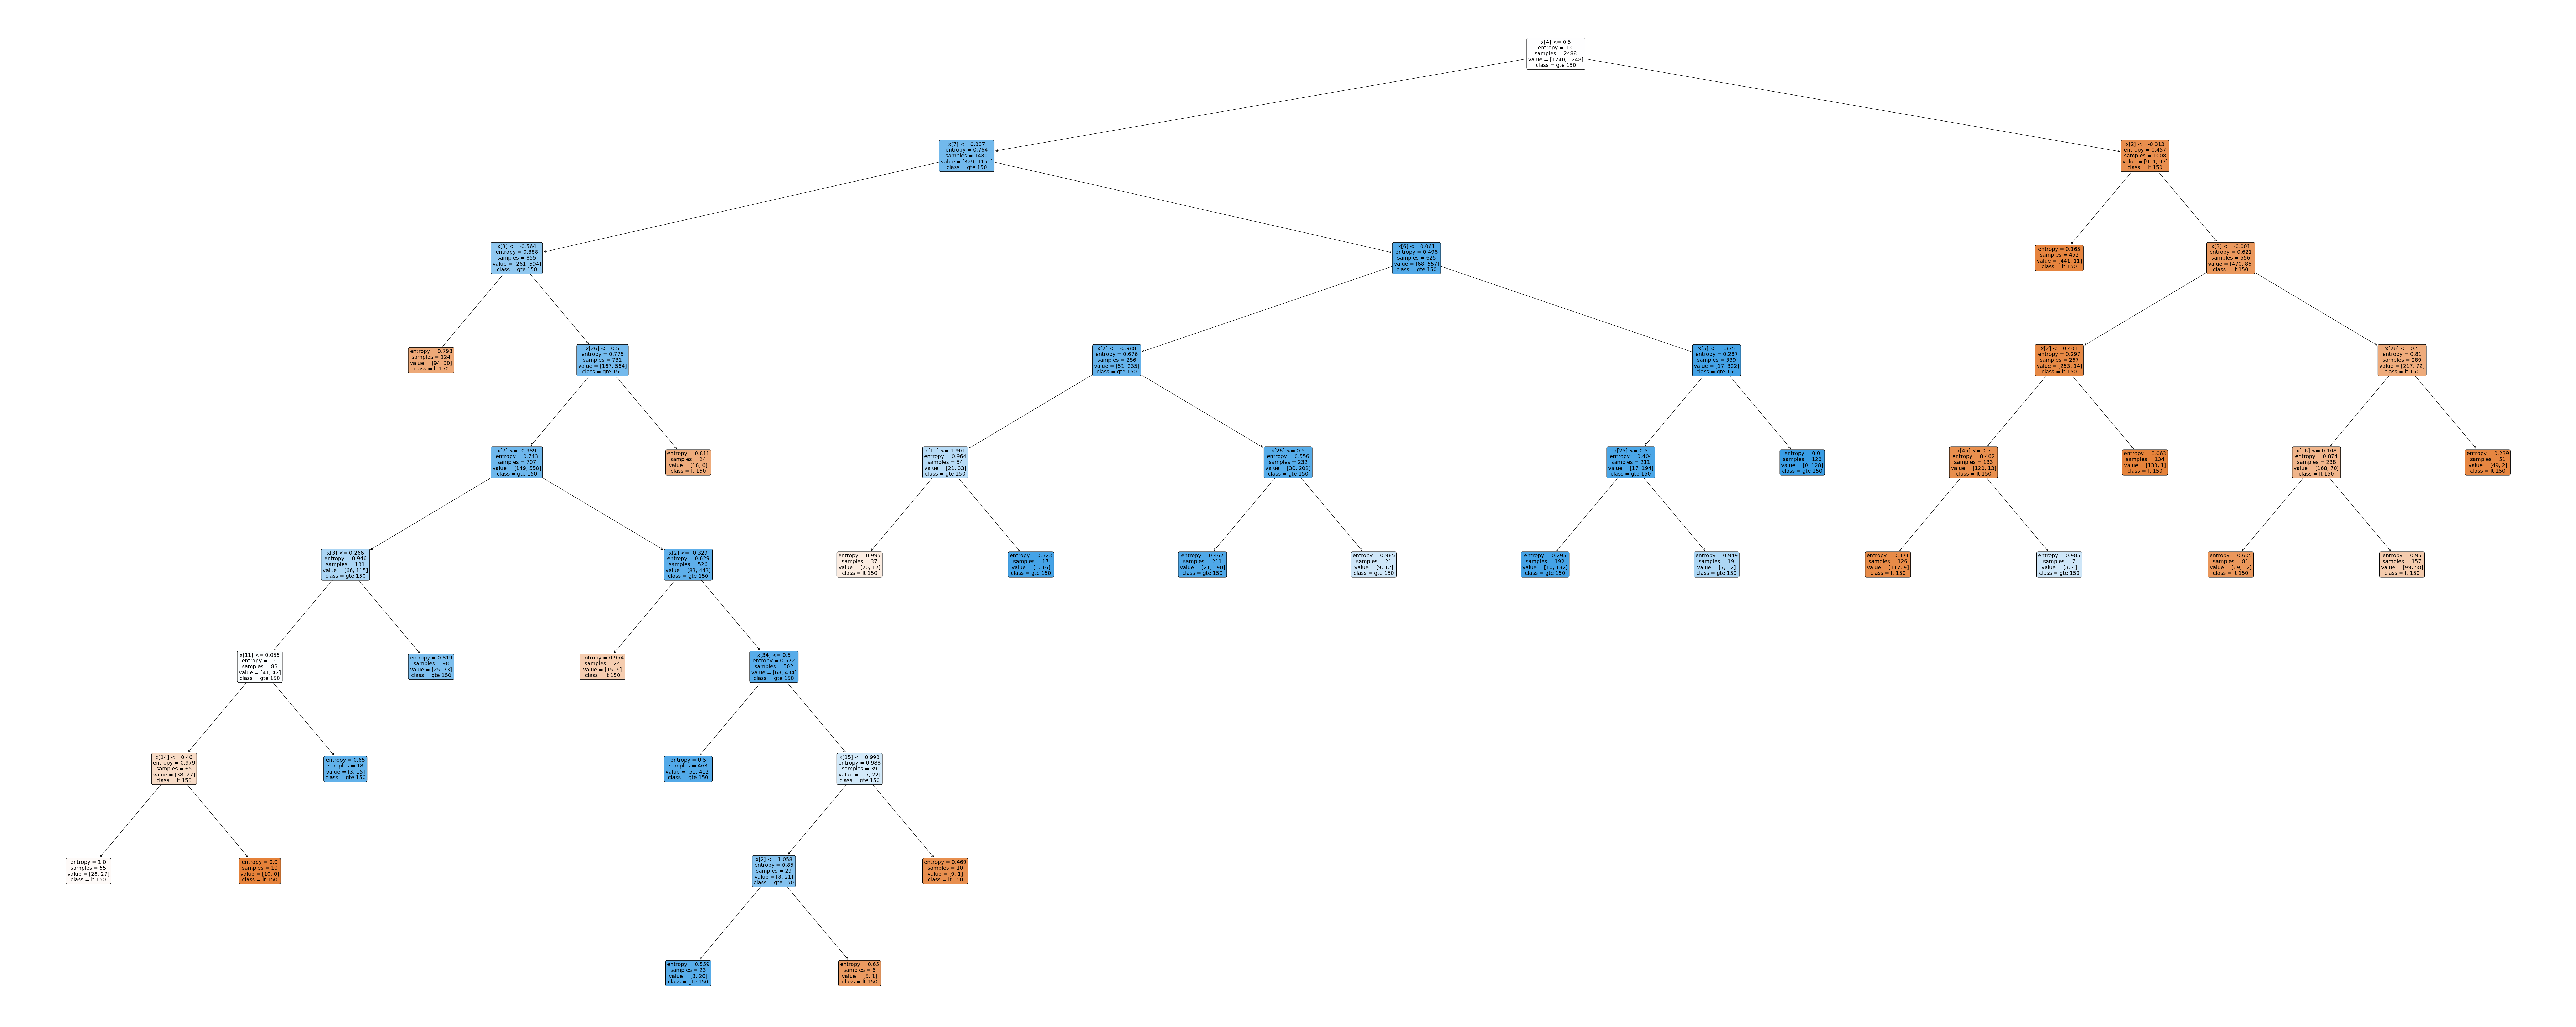

In [ ]:
plt.figure(figsize=(125,50))
tree = plot_tree(grid_search_exh2.best_estimator_, 
              #feature_names=train_inputs.columns.values, # our feature names are stripped from the data set
              class_names=['lt 150', 'gte 150'], 
              filled=True, 
              rounded=True, 
              fontsize=14)

### Conclusion

* Based on the results, we can observe that both the exhaustive grid search and exhaustive random search yield the same best precision score of 0.8605. These approaches outperform the random search and regular grid search, which achieved a maximum precision of 0.8582.

* The accuracy, recall, and F1-score follow similar trends, with the exhaustive grid search and exhaustive random search consistently producing slightly better results compared to the other methods.

* The best performing models across all methods used 'entropy' as the criterion. The max_leaf_nodes was consistent at 25 across all methods, suggesting this is a significant parameter for this specific problem.

* Interestingly, the 'max_depth' parameter differed between the methods. It seems that a lower depth resulted in slightly better precision for the exhaustive methods compared to non-exhaustive methods. This might indicate overfitting at higher depths.